# Monday, October 6th, 2025

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Last time, we looked at visualizing 2D arrays uing `plt.imshow`, and selecting different colormaps to change the colorization.

In [2]:
import matplotlib.cm as cm

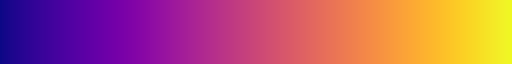

In [3]:
cm.plasma

Each colormap works as a function that takes in a float, where:
 - any input `0` or less returns the color at the left-end of the colormap,
 - any input `1` or more returns the color at the right-end of the colormap,
 - any input between `0` and `1` returns the color that is proportionally between the left-end and right-end of the colormap.

What does the output actually look like when we plug a float into a colormap?

In [4]:
cm.plasma(.25)

(np.float64(0.494877),
 np.float64(0.01199),
 np.float64(0.657865),
 np.float64(1.0))

## RGB(A) values

The output from the colormap above is an Red/Green/Blue/Alpha value, or **RGBA** value. That is, we have a tuple `(R, G, B, A)` where:
 - `R` is the amount of red in the color (`R=1` means full red, `R=0` means no red),
 - `G` is the amount of green in the color (`G=1` means full green, `G=0` means no green),
 - `B` is the amount of blue in the color (`B=1` means full blue, `B=0` means no blue),
 - `A` is the transparency of the color (`A=1` means fully opaque, `A=0` means fully transparent).

If the transparency channel is omitted (i.e. if we work with a pure RGB triple), the color is assume to be fully opaque. We can also supply our own RGB(A) tuples in `plt.plot` to specify colors.

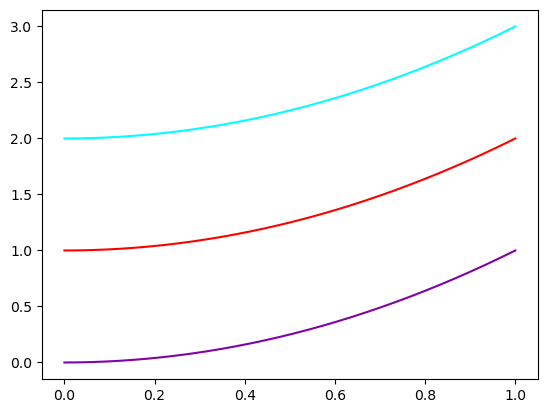

In [6]:
x = np.linspace(0, 1, 1000)

plt.plot(x, x**2, color=(.5, .01, .66))
plt.plot(x, x**2 + 1, color=(1, 0, 0))
plt.plot(x, x**2 + 2, color=(0, 1, 1))

The `plt.imshow` function can also work with RGB(A) values. Instead of supplying a 2D-array, we can supply a 3D-array where:
 - The first axis corresponds to the row of the array
 - The second axis corresponds to the column of the array
 - The third axis corresponds to the RGB(A) values of the array

For example, let's define a `10` by `20` array with `3` color channels (RGB) called `RGB_array`.

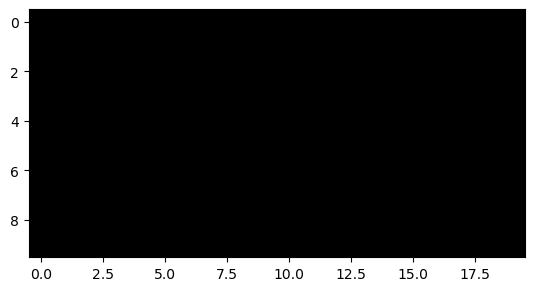

In [7]:
RGB_array = np.zeros((10,20,3))
plt.imshow(RGB_array)

For the above array, we will think of `RGB_array[:,:,0]` as containing the red data. Similarly, `RGB_array[:,:,1]` contains the green data, and `RGB_array[:,:,2]` contains the blue data. Let's add some colored stripes to the array.

*Note:* We can take slices through the rows/columns of an `(m,n,3)` array of RGB values. For example, `RGB_array[:4, 3:7]` will give a `(4,4,3)` array consisting of the RGB triples in rows `0`, `1`, `2`, `3` and columns `3`, `4`, `5`, `6`. If we set `RGB_array[:4, 3:7] = (.1, .7, .9)`, then every RGB triple in these rows/columns will be set to `(.1, .7, .9)`. This is called *broadcasting*, and is a very useful feature of NumPy. 

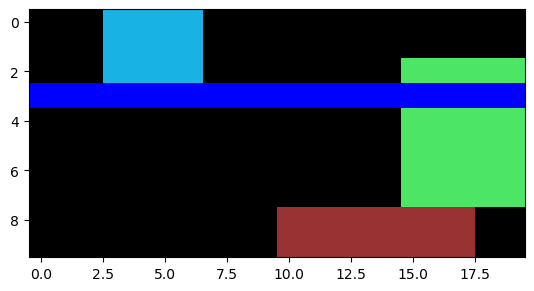

In [11]:
# Add some colored stripes to RGB_array
RGB_array[:4, 3:7] = (.1, .7, .9)
RGB_array[-2:, 10:18] = (.6, .2, .2)
RGB_array[2:8, 15:] = (.3, .9, .4)
RGB_array[3, :] = (0, 0, 1)

plt.imshow(RGB_array)

Most computer images are stored as arrays of RGB(A) values. We can read an image file into an RGB(A) array using `plt.imread`. The syntax is: `plt.imread(<path to some image file>)`. For example, download the image `mario.png` from the [course webpage](https://jllottes.github.io/Schedule/week_06.html) and place it into the same folder as this Jupyter notebook.

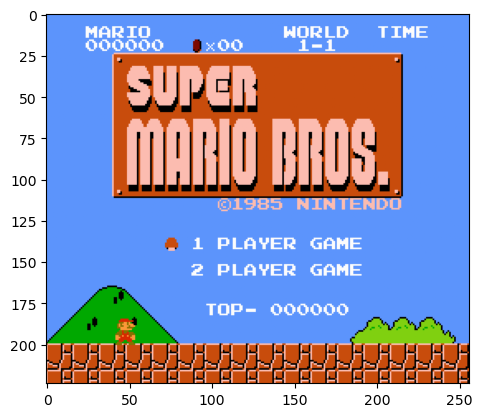

In [23]:
mario = plt.imread('mario.png')

plt.imshow(mario)

We can look at the shape of the array to see if it contains RGB or RGBA values. In this case, the `mario.png` image file includes a transparency channel.

In [24]:
print(mario.shape)

(224, 256, 4)


**Exercise:** Use NumPy slicing to remove the transparency channel from the `mario` array.

In [25]:
mario = mario[:,:,:3]
print(mario.shape)

(224, 256, 3)


**Exercise:** Use NumPy slicing and `plt.imshow` to zoom in on Mario (in the lower-left corner).

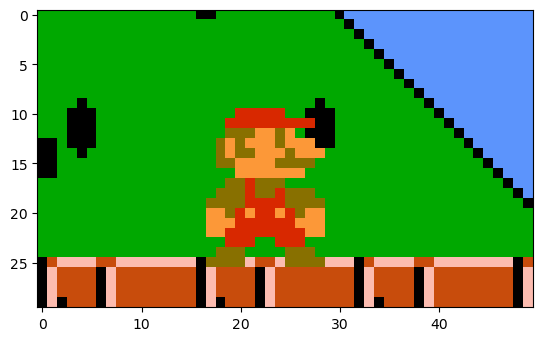

In [26]:
plt.imshow(mario[175:205, 25:75])

**Exercise:** Create an array `blueless_mario` where the blue channel information from `mario` has been removed and plot using `plt.imshow`.

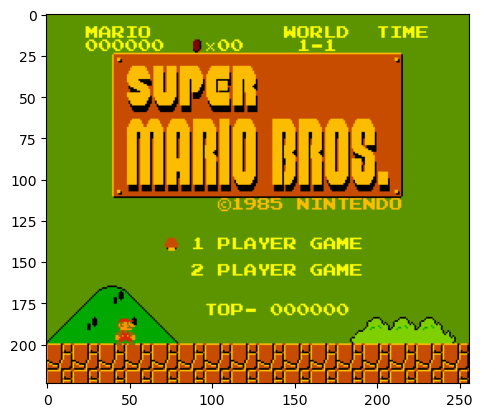

In [27]:
blueless_mario = mario.copy()
blueless_mario[:,:,2] = 0

plt.imshow(blueless_mario)

**Exercise:** Create an array `mixed_mario` where:
 - the red channel of `mixed_mario` matches the green channel of `mario`,
 - the green channel of `mixed_mario` matches the blue channel of `mario`,
 - the blue channel of `mixed_mario` matches the red channel of `mario`.

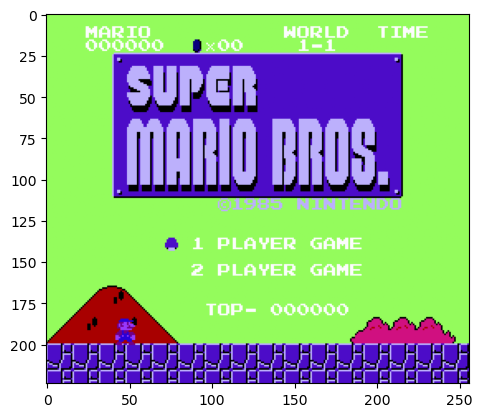

In [19]:
mixed_mario = mario.copy()

mixed_mario[:,:,0] = mario[:,:,1]
mixed_mario[:,:,1] = mario[:,:,2]
mixed_mario[:,:,2] = mario[:,:,0]

plt.imshow(mixed_mario)

With some comfort and fimiliarity linear algebra with NumPy broadcasting, we can accomplish the same task in the following way (do not worry if you don't follow the code, we won't need to do this level of NumPy manipulation in this course):

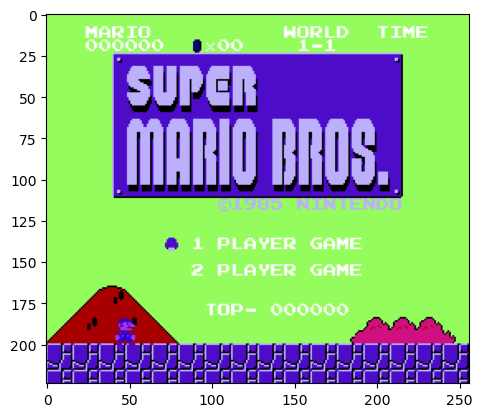

In [62]:
A = np.array([[0,1,0],    # Define a mixing matrix
              [0,0,1],    # which multiplies a vector
              [1,0,0]])   # of (r,g,b) values

mixed_mario = np.matmul(A,mario.reshape(*mario.shape,1)).reshape(*mario.shape)
plt.imshow(mixed_mario)

In [20]:
mario[0,0]

array([0.36078432, 0.5803922 , 0.9882353 ], dtype=float32)

*Note:* For the next project, we will be working with integer-valued RGB triples. The integer-values will range from `0` to `255`. An integer `0` means no color while an integer `255` means full color (equivalent to a float of `1`).

**Exercise:** Convert the `mario` array to an integer-type array containing RGB triples with values between `0` and `255`.

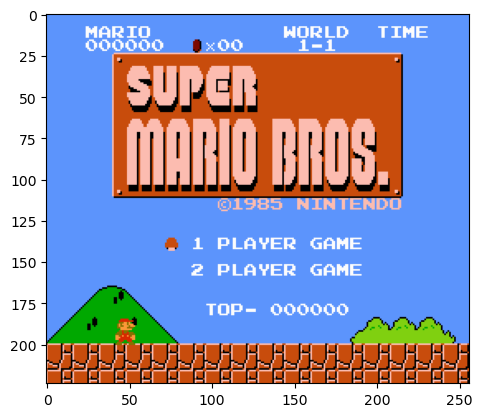

In [21]:
mario_RGB_int = (255 * mario).astype(int)

plt.imshow(mario_RGB_int)

**Exercise**: Convert the `mario_RGB_int` array into a float-type array containing RGB triples with values between `0` and `1`.

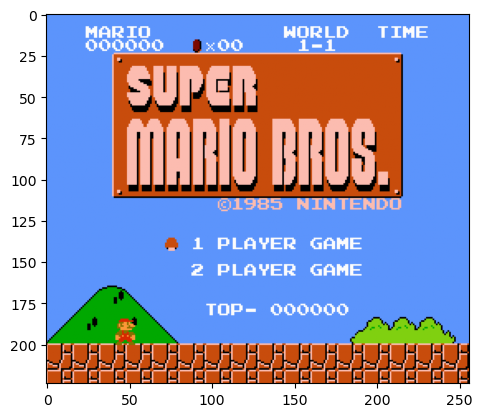

In [25]:
mario_RGB_float = mario_RGB_int / 255

plt.imshow(mario_RGB_float)

## [Project 3: Tartans](https://jllottes.github.io/Projects/tartans/tartans.html)

Let's get started working with tartans by generating vertical and horizontal stripes for the following pattern (see project page for details):

Pattern : 
> B14 K6 B6 K6 B6 K32 OG32

where the colors B, K, and OG are given by the RGB triples:

> B : [52, 80, 100]<br>
> K : [16, 16, 16]<br>
> OG : [92, 100, 40]


To get started, we'll need to initialize an array with the correct shape. What is the total width of this pattern?

In [3]:
total_width = 14 + 6 + 6 + 6 + 6 + 32 + 32
print(total_width)

102


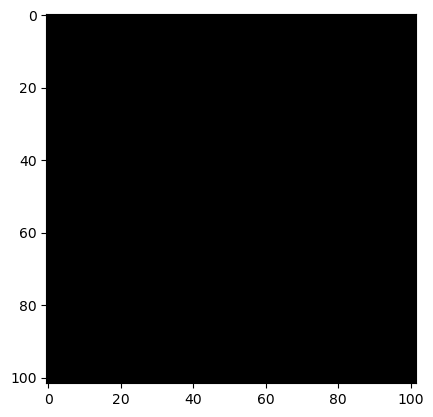

In [4]:
vertical_stripes = np.zeros((102, 102, 3), dtype=int)
plt.imshow(vertical_stripes)

Right now, our array is a pure black picture. Let's add the first vertical stripe, which has color B = [52, 80, 100] and has width 14.

In [6]:
vertical_stripes[:,:14] = (52, 80, 100)

#plt.imshow(vertical_stripes)

**Exercise:** Add the remaining stripes from the sample pattern to the `vertical_stripes` array.

Pattern : 
> B14 K6 B6 K6 B6 K32 OG32

where the colors B, K, and OG are given by the RGB triples:

> B : [52, 80, 100]<br>
> K : [16, 16, 16]<br>
> OG : [92, 100, 40]

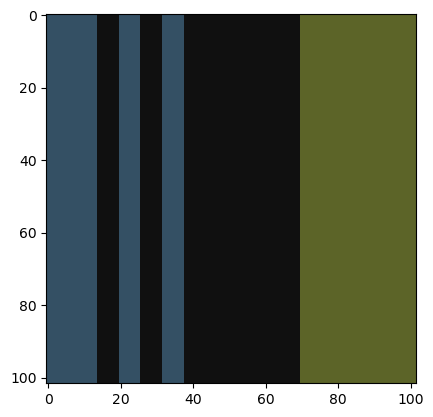

In [7]:
vertical_stripes[:,:14] = (52, 80, 100)
vertical_stripes[:,14:20] = (16, 16, 16)
vertical_stripes[:,20:26] = (52, 80, 100)
vertical_stripes[:,26:32] = (16, 16, 16)
vertical_stripes[:,32:38] = (52, 80, 100)
vertical_stripes[:,38:70] = (16, 16, 16)
vertical_stripes[:,70:102] = (92, 100, 40)

plt.imshow(vertical_stripes)

Some thoughts:
 - We need a much better way to generate this vertical stripes array. There was far too much manual typing/calculation to add each stripe. We'll come back and address this shortly.
 - Now that we have an array of vertical stripes, we can easily generate an array of horizontal stripes. This can be done transposing our array (see below).
 - Once we have vertical and horizontal stripes, we need to super-impose them somehow to generate the tartan pattern.

### Array transposes

For a 2-dimensional matrix, the transpose flips rows and columns. That is, the first row becomes the first column, the second row becomes the second column, etc. In Python, we can use the `.T` method on a 2D array to get its transpose:

In [8]:
a = np.arange(25).reshape(5,5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [9]:
print(a.T)

[[ 0  5 10 15 20]
 [ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]]


We would like to take the transpose of our `vertical_stripes` array so that the columns of `vertical_stripes` become the rows of `horizontal_stripes`. In other words, the vertical stripes will become horizontal stripes.

*Problem:* The `vertical_stripes` array is a 3-dimensional array (rows, columns, color channels). What does `vertical_stripes.T` give us in this case?

In [10]:
print(vertical_stripes.shape)
print(vertical_stripes.T.shape)

(102, 102, 3)
(3, 102, 102)


It turns out that the `.T` attribute reverses the order of the axes. That is, the first axis (rows) becomes the last axis, the second axis (columns) becomes the second-last axis, etc. In the case of the `vertical_stripes` array, the color channel axis became the row axis, the column axis remained as the column axis, and the row axis became the color channel axis. For our needs, this is not useful. Instead, we just want to swap the row and column axes.

We can use the `np.transpose` function to do more targeted transposing:

In [12]:
#help(np.transpose)

When calling `np.transpose`, we can optionally supply a keyword argument `axes` which gives a permutation of the axes of the array. In particular, using `axes = [1, 0, 2]` will give a transposed matrix where:
 - the old axis `1` (i.e. the columns) becomes the new axis `0` (i.e. the rows),
 - the old axis `0` becomes the new axis `1`, and
 - the old axis `2` (i.e. the color channel) remains as axis `2`.

Let's use this to define the `horizontal_stripes` array.

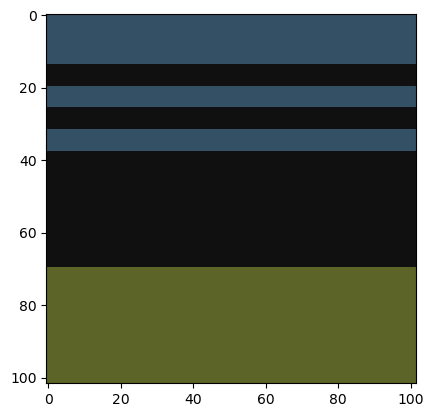

In [13]:
horizontal_stripes = np.transpose(vertical_stripes, axes=[1,0,2])

plt.imshow(horizontal_stripes)

### Creating a tartan from vertical and horizontal arrays

We now have vertical and horizontal stripes. How can we combine them to get a tartan pattern?

One simple idea is to take the average of the horizontal and vertical stripe arrays.

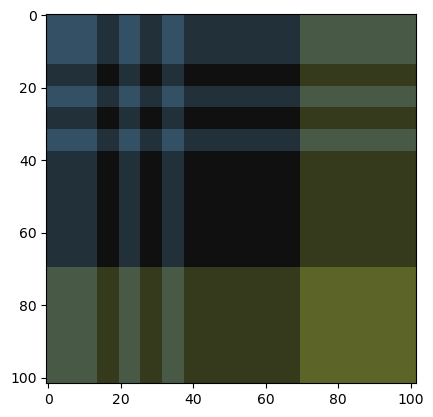

In [18]:
simple_tartan = (vertical_stripes + horizontal_stripes) // 2

plt.imshow(simple_tartan)

This gives flat colors rather than an interleaved combination. Can we instead generate a checkerboard pattern to interleave these stripes? To do so, we want to go row by row, column by column, and alternatingly select a color from the `vertical_stripes` and `horizontal_stripes` arrays.

**Exercise:** Create a `checkerboard_tartan` array that combines the `vertical_stripes` and `horizontal_stripes` arrays in checkerboard pattern.

In [ ]:
checkerboard_tartan = np.zeros((102, 102, 3), dtype=int)

for row in range(102):
    for col in range(102):
        # Write some logic to get the checkboard pattern...
        checkerboard_tartan[row,col] = ?

Where to go from here:
 - We need a better way of generating the `vertical_stripes` array.
 - We need to generate the more authentic tartan pattern described in the project page.
 - We need to pad our tartan pattern to be `500` by `500` rows/columns.

### Generating the `vertical_stripes` array algorithmically

For now, let's focus on converting the given tartan pattern into something that we can use to easily generate the `vertical_stripes` array. 

Pattern : 
> B14 K6 B6 K6 B6 K32 OG32

where the colors B, K, and OG are given by the RGB triples:

> B : [52, 80, 100]<br>
> K : [16, 16, 16]<br>
> OG : [92, 100, 40]

Can we code this information as some sort of Python list(s)?

Can we find the total width of the pattern without manually adding the widths by hand?

With the total width calculated, we can intialize the `vertical_stripes` array that we will then fill with colored stripes.
Can we use a `for` loop to iterate through each width/RGB pair and add the corresponding stripe to the `vertical_stripes` array?